In [1118]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io
from scipy import special

fields = "X_test", "X", "y"

wine = io.loadmat("data.mat")
for field in fields:
        print(field, wine[field].shape)

X_test (497, 12)
X (6000, 12)
y (6000, 1)


PROBLEM 4.1

In [1119]:
def train_val_split(data, split_val):
    np.random.seed(42)
    np.random.shuffle(data)
    train = data[:split_val]
    validation = data[split_val:]
    return train, validation

In [1120]:
X_matrix = np.insert(wine['X'], 12, 1, axis=1)
X_train, X_val = train_val_split(X_matrix, 5000)
y_train, y_val = train_val_split(wine['y'], 5000)
X_test = np.insert(wine['X_test'], 12, 1, axis=1)

In [1250]:
def gradient_descent(X, y, lam, ep):
    cost = np.array([])
    w = np.zeros((13,1))
    iters = 0
    while(True):
        w_new = w + ep * (-2*lam*w + np.dot(X.T, y - special.expit(np.dot(X, w))))
        delta_w = w_new - w
        if all(abs(val) < .001 for val in delta_w):
            break
        w = w_new
        Xw = np.dot(X, w)
        y1 = np.dot(-y.T, -np.log(1 + np.e**-Xw))
        y2 = np.dot((1-y).T, -Xw - np.log(1 + np.e**-Xw))
        iter_cost = lam * np.linalg.norm(w) - (y1 + y2)
        cost = np.append(cost, iter_cost)
        iters += 1
    return w, cost, iters

in my gradient descent function I decided to stop updating w after the change in w
was less than a small value, indicating that not much was being changed by the update 
anymore.

expirementing with lambda and epsilon values:

In [1218]:
w, cost, iters = gradient_descent(X_train, y_train, .1, 1e-6)
pred = np.round(special.expit(np.dot(X_train, w)))
training_error = (pred == y_train).sum() / len(y_train)
training_error

0.9354

In [1219]:
val_pred = np.round(special.expit(np.dot(X_val, w)))
(val_pred == y_val).sum() / len(y_val)

0.93

In [1220]:
w2, cost2, iters2 = gradient_descent(X_train, y_train, .01, 1e-6)
pred2 = np.round(special.expit(np.dot(X_train, w2)))
training_error2 = (pred2 == y_train).sum() / len(y_train)
training_error2

0.9558

In [1221]:
val_pred2 = np.round(special.expit(np.dot(X_val, w2)))
(val_pred2 == y_val).sum() / len(y_val)

0.954

In [1222]:
w3, cost3, iters3 = gradient_descent(X_train, y_train, 1, 1e-6)
pred3 = np.round(special.expit(np.dot(X_train, w3)))
training_error3 = (pred3 == y_train).sum() / len(y_train)
training_error3

0.9358

In [1223]:
val_pred3 = np.round(special.expit(np.dot(X_val, w3)))
(val_pred3 == y_val).sum() / len(y_val)

0.926

In [1224]:
w4, cost4, iters4 = gradient_descent(X_train, y_train, .001, 1e-6)
pred4 = np.round(special.expit(np.dot(X_train, w4)))
training_error4 = (pred4 == y_train).sum() / len(y_train)
training_error4

0.9354

In [1225]:
val_pred4 = np.round(special.expit(np.dot(X_val, w4)))
(val_pred4 == y_val).sum() / len(y_val)

0.925

In [1226]:
w5, cost5, iters5 = gradient_descent(X_train, y_train, .01, 1e-7)
pred5 = np.round(special.expit(np.dot(X_train, w5)))
training_error5 = (pred5 == y_train).sum() / len(y_train)
training_error5

0.7564

In [1227]:
val_pred5 = np.round(special.expit(np.dot(X_val, w5)))
(val_pred5 == y_val).sum() / len(y_val)

0.749

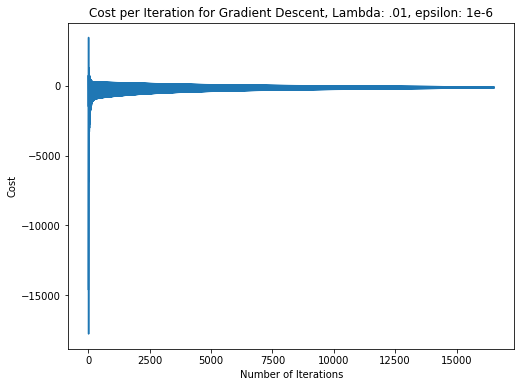

In [1228]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(iters2), cost2)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost per Iteration for Gradient Descent, Lambda: .01, epsilon: 1e-6');

\pagebreak

PROBLEM 4.2

In [1262]:
def stochastic_gradient_descent(X, y, lam, ep):
    cost = np.array([])
    w = np.zeros(13)
    w_old = w
    iters = 0
    while(True):
        for i in np.arange(len(X)):
            pt = np.random.randint(len(X))
            X_pt = X[pt]
            y_pt = y[pt]
            w = w -ep *(2*lam*w-((y_pt-special.expit(np.dot(X_pt.T,w)))*X_pt))
            Xw = np.dot(X, w)
            y_1 = np.dot(-y.T, -np.log(1 + np.e**-Xw))
            y_2 = np.dot((1-y).T, -Xw - np.log(1 + np.e**-Xw))
            iter_cost = lam * np.linalg.norm(w) - (y_1 + y_2)
            cost = np.append(cost, iter_cost)
            iters += 1
            if iters % 1000 == 0:
                delta_w = w - w_old
                if all(abs(val) < .01 for val in delta_w):
                    return w, cost, iters
                w_old = w

I decided to stop updating w according to the same premise as in batch gradient descent,
but since the change in stochastic descent is only 1 entry at a time, I don't check for 
change in w for every 1000 iterations to ensure w was able to change enough not to 
stop iterating immediately.

experimenting with epsilon values:

In [1253]:
w_s, cost_s, iters_s = stochastic_gradient_descent(X_train, y_train, .01, .0001)
pred_s = np.round(special.expit(np.dot(X_train, w_s)))
training_error_s = (np.reshape(pred_s, (5000,1)) == y_train).sum() / len(y_train)
training_error_s

0.9344

In [1254]:
val_pred_s = np.round(special.expit(np.dot(X_val, w_s)))
(np.reshape(val_pred_s, (1000,1)) == y_val).sum() / len(y_val)

0.929

In [1263]:
w_s2,cost_s2,iters_s2 = stochastic_gradient_descent(X_train, y_train,.01,.00001)
pred_s2 = np.round(special.expit(np.dot(X_train, w_s2)))
training_error_s2 = (np.reshape(pred_s2, (5000,1)) == y_train).sum() / len(y_train)
training_error_s2

0.7942

In [1256]:
val_pred_s2 = np.round(special.expit(np.dot(X_val, w_s2)))
(np.reshape(val_pred_s2, (1000,1)) == y_val).sum() / len(y_val)

0.794

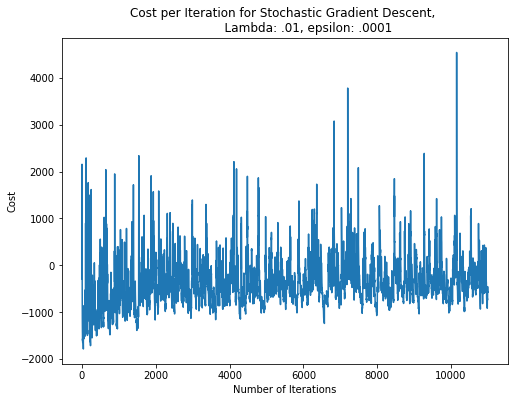

In [1261]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(iters_s), cost_s)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('''Cost per Iteration for Stochastic Gradient Descent, 
            Lambda: .01, epsilon: .0001''');

We see that while batch gradient descent doesn't bounce around between large positive and 
negative cost as much as stochastic gradient descent does as you increase the number
of iterations, stochastic gradient descent find an optimal w faster.

\pagebreak

PROBLEM 4.3

In [1258]:
def stochastic_gradient_descent_var(X, y, lam, ep):
    cost = np.array([])
    w = np.zeros(13)
    w_old = w
    iters = 0
    while(True):
        for i in np.arange(len(X)):
            pt = np.random.randint(len(X))
            X_pt = X[pt]
            y_pt = y[pt]
            w = w-ep*(2*lam*w-((y_pt-special.expit(np.dot(X_pt.T, w)))*X_pt))
            Xw = np.dot(X, w)
            y_1 = np.dot(-y.T, -np.log(1 + np.e**-Xw))
            y_2 = np.dot((1-y).T, -Xw - np.log(1 + np.e**-Xw))
            iter_cost = lam * np.linalg.norm(w) - (y_1 + y_2)
            cost = np.append(cost, iter_cost)
            iters += 1
            if iters % 1000 == 0:
                ep = ep/(iters)
                delta_w = w - w_old
                if all(abs(val) < .001 for val in delta_w):
                    return w, cost, iters
                w_old = w

Same as stochastic gradient descent, but I decreased epsilon once every 1000 iterations
and chose to do this because otherwise it decreased too significantly for w to optimize.

Exeriment to see if epsilon value still optimal:

In [1268]:
w_sv,cost_sv,iters_sv = stochastic_gradient_descent_var(X_train,y_train,.01,.001)
pred_sv = np.round(special.expit(np.dot(X_train, w_sv)))
training_error_sv = (np.reshape(pred_sv,(5000,1))==y_train).sum()/len(y_train)
training_error_sv

0.9348

In [1269]:
val_pred_sv = np.round(special.expit(np.dot(X_val, w_sv)))
(np.reshape(val_pred_sv, (1000,1)) == y_val).sum() / len(y_val)

0.922

In [1264]:
w_sv2,cost_sv2,iters_sv2=stochastic_gradient_descent_var(X_train,y_train,.01,.0001)
pred_sv2 = np.round(special.expit(np.dot(X_train, w_sv2)))
training_error_sv2 = (np.reshape(pred_sv2,(5000,1))==y_train).sum()/len(y_train)
training_error_sv2

0.9086

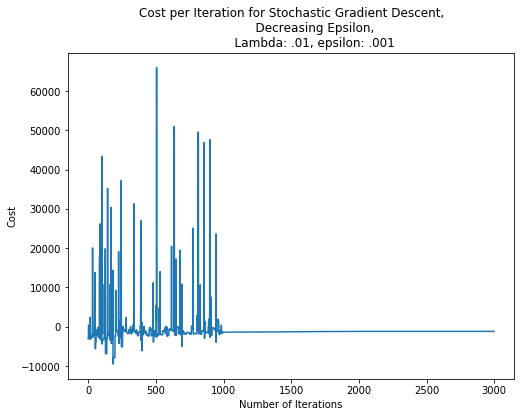

In [1270]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(iters_sv), cost_sv)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('''Cost per Iteration for Stochastic Gradient Descent,
            Decreasing Epsilon,
            Lambda: .01, epsilon: .001''');

Yes, this strategy is better than having a constant epsilon because it reduces the step size
as w becomes more optimized in order to converge to the minimum significantly faster.

\pagebreak

PROBLEM 4.4

In [1235]:
w_f, cost_f, iters_f = gradient_descent(X_matrix, wine['y'], .01, 1e-6)
pred_f = np.round(special.expit(np.dot(X_matrix, w_f)))
training_error_f = (pred_f == wine['y']).sum() / len(wine['y'])
training_error_f

0.9705

In [1247]:
test_pred = np.reshape(np.round(special.expit(np.dot(X_test, w_f))), (497,))

In [1248]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [1249]:
results_to_csv(test_pred)

My kaggle username is ayee and my best score was .95302. I used batch gradient descent with lambda of
.01 and epsilon of 1e-6 for my submission because it was the best training/validation error 
I got in all my testing.